In [1]:
#!/usr/bin/python
# this file generates data and the gnuplot file used for the delta pwm plot 
# needs python, scipy and gnuplot (4.0 used)
from scipy import *

freq= 0.05      # frequency of the reference signal
step=1e-2       # calculation time step
hysteresis=0.15 # hysteresis of the delta pwm
current_increase=0.5 # rate of increase (or decrease) in the output current
current_decrease=-0.5

direction=0     # direction=0 when output current increase, 1 otherwise
current=[0]     # this is the current waveform
pwm=[0]         # This vector is the pwm signal
grid=["0"]      # this vector contains the x-values at which the pwm signal
                # changes state
file = open("data.dat","w") # the data file

for i in range(int(1/(freq*step))):
    reference=sin(i*step*freq*2*pi)
    high_limit=reference+hysteresis
    low_limit=reference-hysteresis
    if direction==0:
        if current[i]<high_limit:    #if current is increasing, but we still
                                        #are under the upper limit, carry on
            current.append(current[i]+current_increase*step)
            pwm.append(1)               
        else:                           #else change pwm state
            current.append(current[i]+current_decrease*step)
            direction=1
            grid.append("%s"%(i*step))  #stores the time value at which the 
                                        #pwm changed state  
            pwm.append(0)            
    elif direction==1:                  #if current is decreasing, but we still
                                        #are over the lower limit, carry on
        if current[i]>low_limit:
            current.append(current[i]+current_decrease*step)
            pwm.append(0)           
        else:                           #else change pwm state
            current.append(current[i]+current_increase*step)
            direction=0
            grid.append("%s"%(i*step))  #stores the time value at which the 
                                        #pwm changed state
            pwm.append(1)
    file.write('%s\t%s\t%s\t%s\t%s\t%s\n'%(i*step,pwm[i],current[i],
                                        high_limit,
                                          low_limit,
                                          reference))
file.close()                            # end of data generation

xtics=',"" '.join(grid)                 # creates a string used for the x-tics
file = open("delta.plt","w")            # generates the gnuplot file
file.write("""
# This file is used to generate a plot that explains the 
# principle of the delta pwm

# graph configuration
#set terminal postscript eps enhanced "Times-Roman" 24 color solid
set terminal png size 1000,800 enhanced font "Times-Roman,24"


set encoding utf8
#iso_8859_15
unset title
#set linetype 1 lt 3 lw 3 pt 0 ps 0
#set linetype 2 lt 2 lw 1 pt 0 ps 0
#set linetype 3 lt 8 lw 2 pt 0 ps 0
#set linetype 4 lt 4 lw 3 pt 0 ps 0

set style line 1 lt 3 lw 3 pt 0 ps 0                                           
set style line 2 lt 2 lw 1 pt 0 ps 0                                           
set style line 3 lt 8 lw 2 pt 0 ps 0
set style line 4 lt 4 lw 3 pt 0 ps 0 

set border 15 lt 7 lw 4

set grid xtics ytics
set xlabel ""
set format x ""
set bmargin 0
set tmargin 0
  
set ytics ("0" 0)
set xtics (%s)  

set output "delta.png"
set multiplot
        set ylabel "Analog signals"
        set origin 0,0.54
        set size 1,0.45
        plot [0:19][-1.2:1.2] "data.dat" using 1:6 ls 3 title 'Reference' w l,\
        '' using 1:4 w l ls 2 title 'Limits',\
        '' using 1:5 w l ls 2 title '',\
        '' using 1:3 w l ls 1 title 'Output'

        set ytics ("0" 0, "1" 1)
        set ylabel "PWM signal"
        set xlabel "Time"
        set origin 0,0.09
        plot [0:19][-0.25:1.25] 'data.dat' using 1:2 ls 4 title '' w l
unset multiplot """ %xtics)
file.close()                            # end of the gnuplot file.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# inline plots for matplotlib
%matplotlib inline

# This loads the magics for gnuplot
%load_ext gnuplot_kernel

In [3]:
%gnuplot qt size 600,400

In [4]:
%%gnuplot 
%gnuplot qt size 600,400

%gnuplot qt size 600,400
         ^
         invalid command


In [5]:
%gnuplot inline

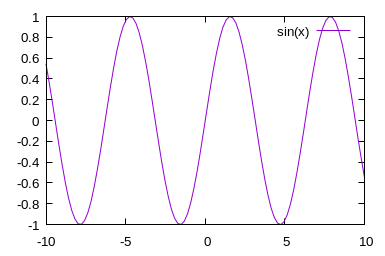

set output '/tmp/gnuplot-inline-1515487996.3981624.719599415323.png'
plot sin(x)
unset output

In [6]:
%%gnuplot 
plot sin(x)

In [7]:
#%%gnuplot 
from os import system, remove
system('gnuplot delta.plt')


0

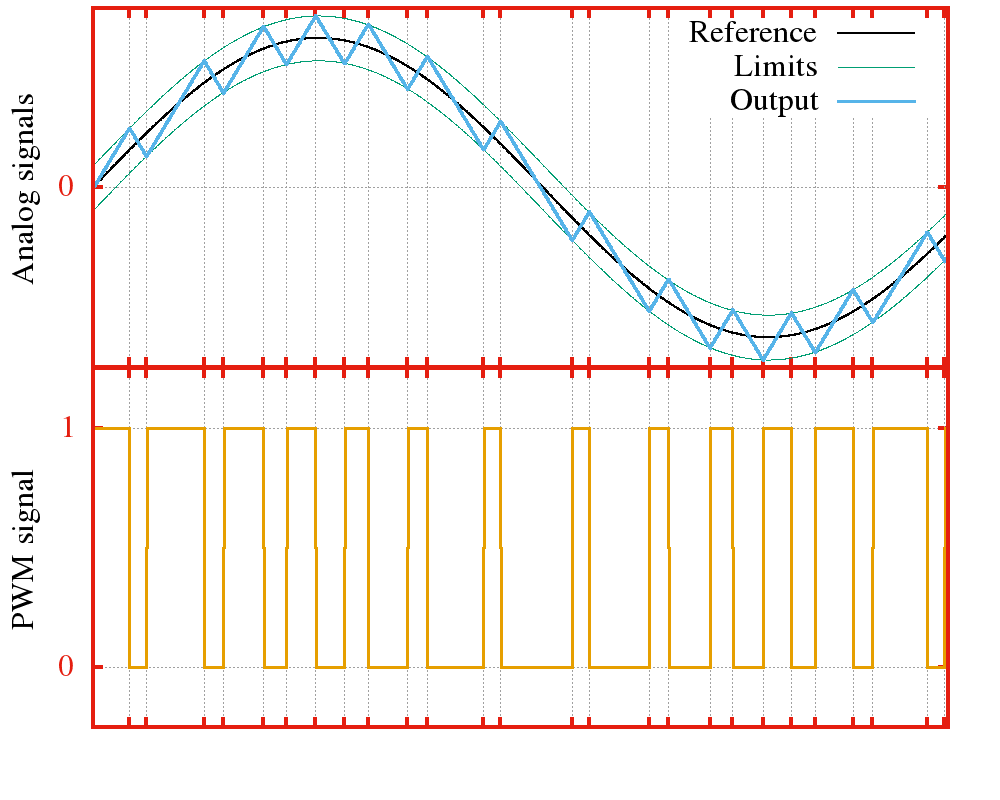

In [41]:
from IPython.display import Image
Image(filename='./delta.png')